In [6]:
import megatron as me
import pandas as pd
import numpy as np
from scipy.sparse import load_npz

In [6]:
me.__version__

'0.1a'

In [7]:
workdir = 'result_larry_subset'
me.settings.set_workdir(workdir)

Saving results in: result_larry_subset


In [8]:
me.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [9]:
mat_counts = load_npz('./input/raw/counts_matrix_in_vitro.npz')
mat_counts

<130887x25289 sparse matrix of type '<class 'numpy.float64'>'
	with 176867560 stored elements in Compressed Sparse Column format>

In [11]:
df_genes = pd.read_csv('./input/raw/gene_names_in_vitro.txt.gz', sep='\t',index_col=0,header=None)
df_genes.index.name = None
df_genes.head()

""
0610006L08Rik
0610007P14Rik
0610009B22Rik
0610009E02Rik
0610009L18Rik


In [12]:
metadata = pd.read_csv('./input/raw/cell_metadata_in_vitro.txt.gz', sep='\t')
metadata.head()

,Time point,Population,Annotation,Well
0,6.0,LK,undiff,2
1,6.0,LK,undiff,2
2,6.0,LK,Monocyte,2
3,6.0,LK,Neutrophil,2
4,6.0,LK,undiff,2


In [13]:
adata = me.AnnData(X=mat_counts, obs=metadata, var=pd.DataFrame(df_genes))

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/hc_megatron/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [14]:
adata

AnnData object with n_obs × n_vars = 130887 × 25289
    obs: 'Time point', 'Population', 'Annotation', 'Well'

In [15]:
mat_clones = load_npz('./input/raw/clone_annotation_in_vitro.npz')
mat_clones

<130887x5864 sparse matrix of type '<class 'numpy.bool_'>'
	with 49302 stored elements in Compressed Sparse Column format>

In [16]:
me.pp.add_clones(adata, 
                 mat=mat_clones)

In [17]:
adata

AnnData object with n_obs × n_vars = 130887 × 25289
    obs: 'Time point', 'Population', 'Annotation', 'Well'
    uns: 'clone'
    obsm: 'X_clone'

In [18]:
me.pp.filter_cells_rna(adata,min_n_genes=100)
me.pp.filter_genes(adata,min_n_cells=5)

before filtering: 
130887 cells,  25289 genes
filter cells based on min_n_genes
after filtering out low-quality cells: 
130887 cells,  25289 genes
Before filtering: 
130887 cells, 25289 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
130887 cells, 19767 genes


In [19]:
me.pp.cal_qc_rna(adata)

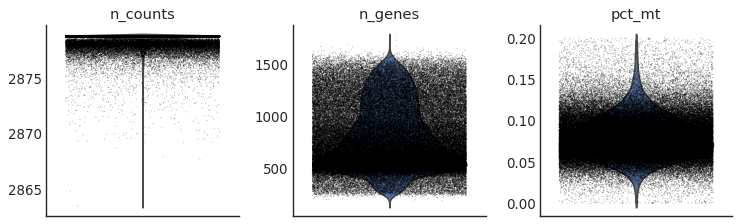

In [20]:
me.pl.violin(adata,list_obs=['n_counts','n_genes','pct_mt'],alpha=0.3)

In [21]:
me.pp.normalize(adata,method='lib_size')
me.pp.log_transform(adata)

In [22]:
me.pp.select_variable_genes(adata)

2000 variable genes are selected.


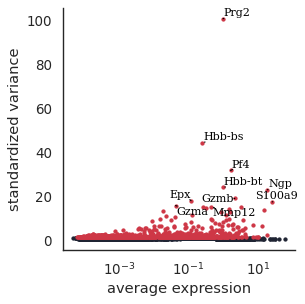

In [23]:
me.pl.variable_genes(adata,show_texts=True)

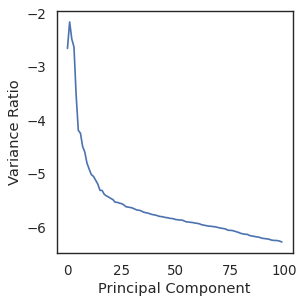

In [24]:
me.pp.pca(adata,feature='highly_variable',n_components=100)
me.pl.pca_variance_ratio(adata,show_cutoff=False)

the number of selected PC is: 50


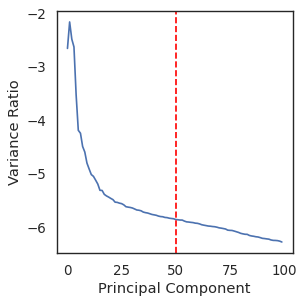

In [25]:
me.pp.select_pcs(adata, n_pcs=50)
me.pl.pca_variance_ratio(adata)

In [26]:
me.tl.umap(adata,obsm='X_pca',n_dim=50)

In [27]:
adata

AnnData object with n_obs × n_vars = 130887 × 19767
    obs: 'Time point', 'Population', 'Annotation', 'Well', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt'
    var: 'n_counts', 'n_cells', 'pct_cells', 'variances_norm', 'variances', 'means', 'highly_variable'
    uns: 'clone', 'pca'
    obsm: 'X_clone', 'X_pca', 'X_umap'
    layers: 'raw'

In [28]:
adata.obs['Time point'] = adata.obs['Time point'].astype(str)

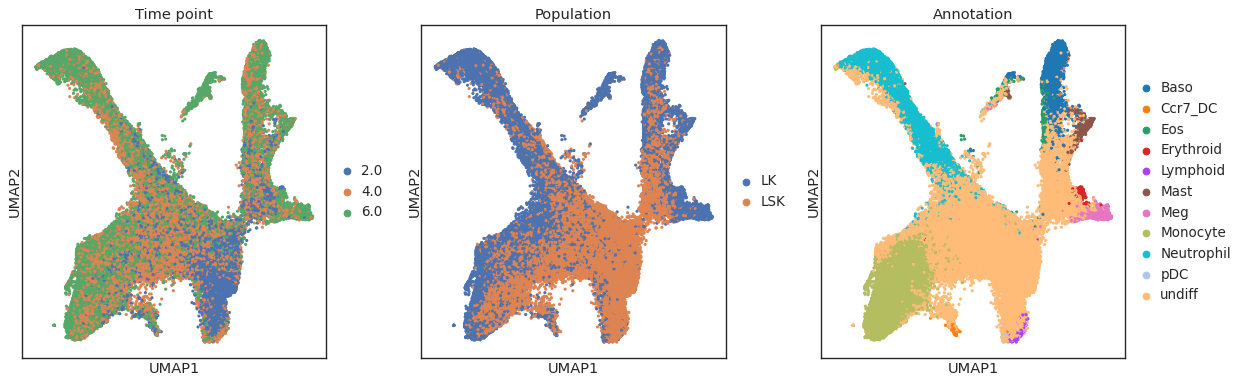

In [29]:
me.pl.umap(adata,color=['Time point','Population','Annotation'],drawing_order='random')

In [30]:
cells_subset = pd.read_csv('./input/processed/output_subset/metadata.tsv.gz',sep='\t',index_col=0)

In [31]:
print(cells_subset.shape)
cells_subset.head()

(3221, 4)


,time,Population,Annotation,Well
84,6.0,LK,Mast,2
115,6.0,LK,Monocyte,2
190,6.0,LK,Mast,2
205,6.0,LK,Mast,2
337,6.0,LK,Meg,2


In [32]:
adata_subset = adata[cells_subset.index,:].copy()
adata_subset

AnnData object with n_obs × n_vars = 3221 × 19767
    obs: 'Time point', 'Population', 'Annotation', 'Well', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt'
    var: 'n_counts', 'n_cells', 'pct_cells', 'variances_norm', 'variances', 'means', 'highly_variable'
    uns: 'clone', 'pca', 'color'
    obsm: 'X_clone', 'X_pca', 'X_umap'
    layers: 'raw'

In [33]:
me.pp.filter_clones(adata_subset,min_cells=1)

Before filtering: 5864 clones
After filtering: 365 clones


In [34]:
adata_subset

AnnData object with n_obs × n_vars = 3221 × 19767
    obs: 'Time point', 'Population', 'Annotation', 'Well', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt'
    var: 'n_counts', 'n_cells', 'pct_cells', 'variances_norm', 'variances', 'means', 'highly_variable'
    uns: 'clone', 'pca', 'color'
    obsm: 'X_clone', 'X_pca', 'X_umap'
    layers: 'raw'

In [36]:
coord_subset = pd.read_csv('./input/processed/output_subset/coordinates.tsv.gz', sep='\t', index_col=0)
coord_subset.index = coord_subset.index.astype(str)
print(coord_subset.shape)
coord_subset.head()

(3221, 2)


,0,1
84,-1674.817,-867.362
115,2970.137,390.955
190,-1667.094,-846.103
205,-1769.354,-902.560
337,-1866.029,739.786


In [37]:
adata_subset.obsm['X_umap_paper'] = coord_subset.values

In [38]:
adata_subset

AnnData object with n_obs × n_vars = 3221 × 19767
    obs: 'Time point', 'Population', 'Annotation', 'Well', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt'
    var: 'n_counts', 'n_cells', 'pct_cells', 'variances_norm', 'variances', 'means', 'highly_variable'
    uns: 'clone', 'pca', 'color'
    obsm: 'X_clone', 'X_pca', 'X_umap', 'X_umap_paper'
    layers: 'raw'

In [39]:
me.tl.clone_distance(adata_subset,
                     method='directed_graph',
                     obsm='X_umap_paper',
                     layer=None,
                     anno_time='Time point',
                     radius=500)

Finished: 16.428053565820058 mins


In [40]:
adata_subset.uns['clone'].keys()

dict_keys(['anno', 'distance'])

In [41]:
me.tl.cluster_clones(adata_subset,
                     n_clusters=6,
                     method='hierarchical')

In [42]:
adata_subset.uns['clone']['anno']

,hierarchical
50,6
82,5
105,1
111,6
134,3
...,...
5805,5
5806,3
5818,5
5832,5


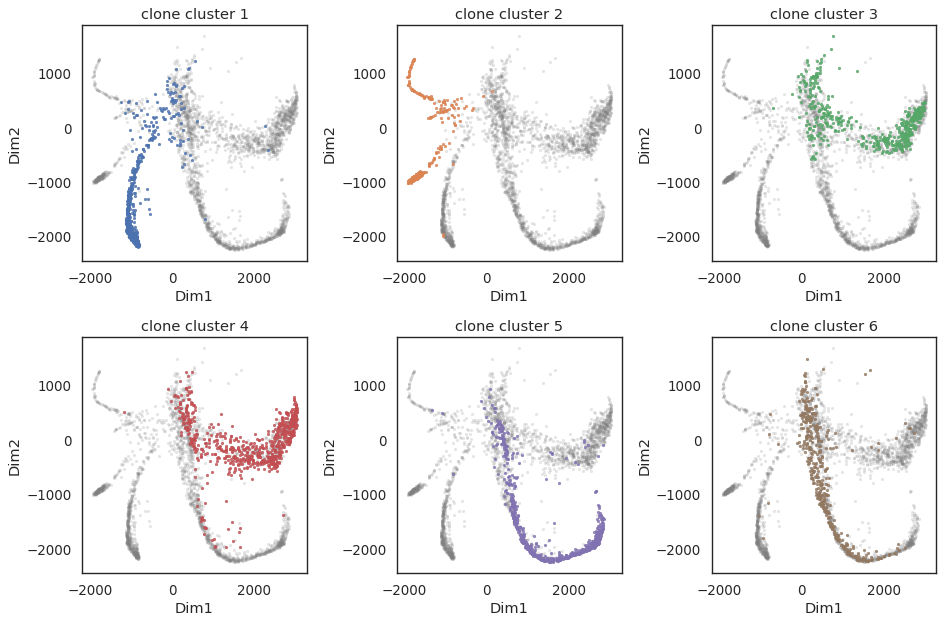

In [43]:
me.pl.clone_scatter(adata_subset, group='hierarchical', obsm='X_umap_paper',show_contour=False, 
                    levels=6, thresh=0.1)

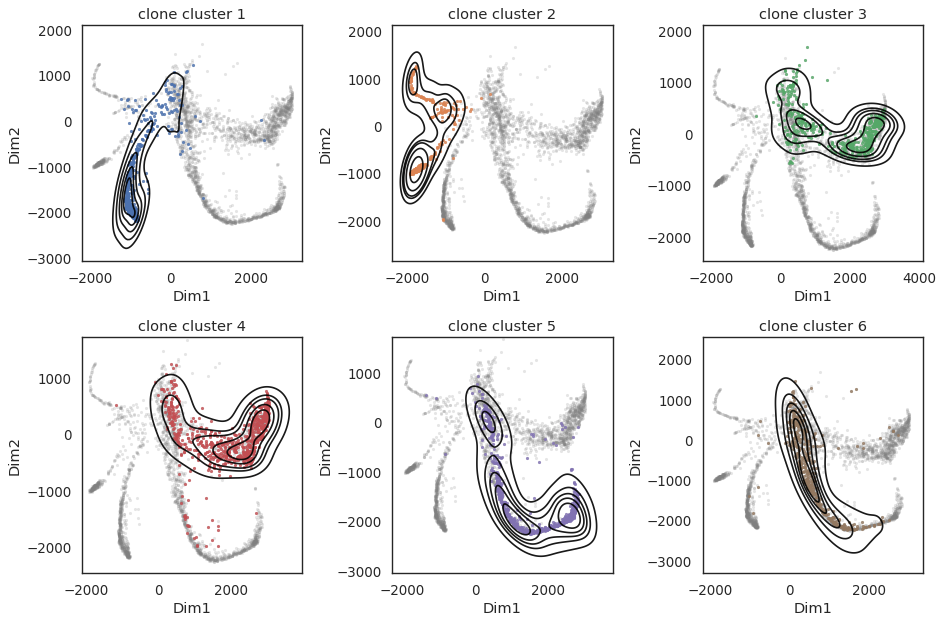

In [44]:
me.pl.clone_scatter(adata_subset, group='hierarchical', obsm='X_umap_paper',show_contour=True, 
                    levels=6, thresh=0.1)

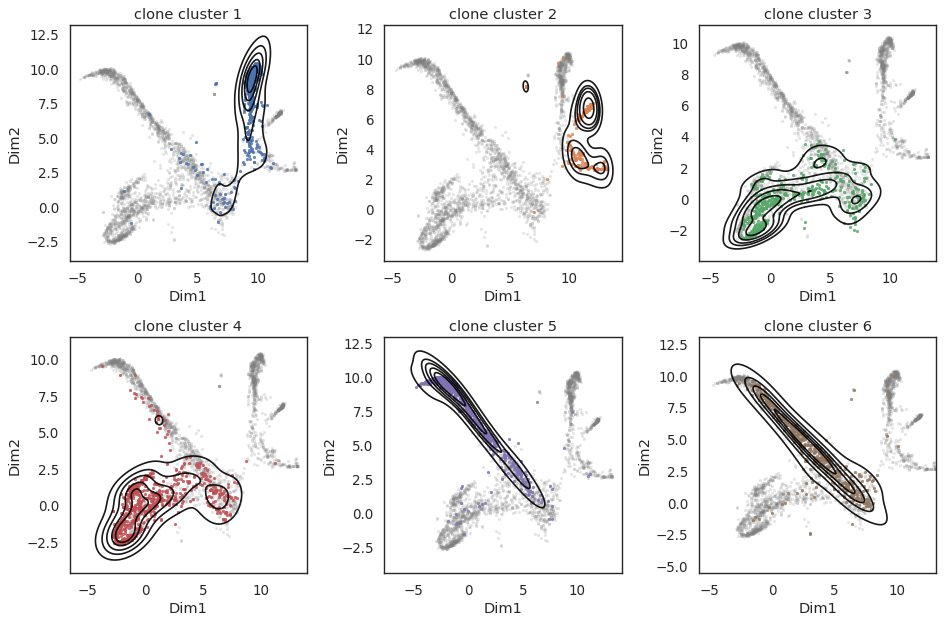

In [45]:
me.pl.clone_scatter(adata_subset, group='hierarchical', obsm='X_umap',show_contour=True, 
                    levels=6, thresh=0.1)